# LBPD Stop EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
file_path = '/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/processed_data/'

# Race

In [3]:
race_df = pd.read_csv(file_path + 'PROCESSED_1_race.csv')
race_df.drop('ObjectId', axis=1, inplace=True)
race_df.rename(columns= lambda x: re.sub('perceivedRace_', '', x), inplace=True)

In [4]:
race_df.head(3)

,StopID,PID,Asian,Black,Hispanic,Middle Eastern or South Asian,Native American,Pacific Islander,White
0,5782,1,0,0,0,0,0,0,1
1,5785,1,0,0,0,0,0,0,1
2,5786,1,0,0,0,0,0,0,1


In [5]:
race_cols = race_df.drop(['StopID', 'PID'], axis=1).columns

### Aggregate number of police stops

In [6]:
print('The total number of LBPD police stops in 2019 is', len(race_df['StopID'].unique()))

The total number of LBPD police stops in 2019 is 36788


In [7]:
stop_sums = pd.DataFrame(race_df[race_cols].sum()).reset_index()
stop_sums.rename(columns={'index': 'race', 0: 'total_stops'}, inplace=True)

In [8]:
stop_sums

,race,total_stops
0,Asian,3150
1,Black,12472
2,Hispanic,16716
3,Middle Eastern or South Asian,1804
4,Native American,1301
5,Pacific Islander,1700
6,White,10972


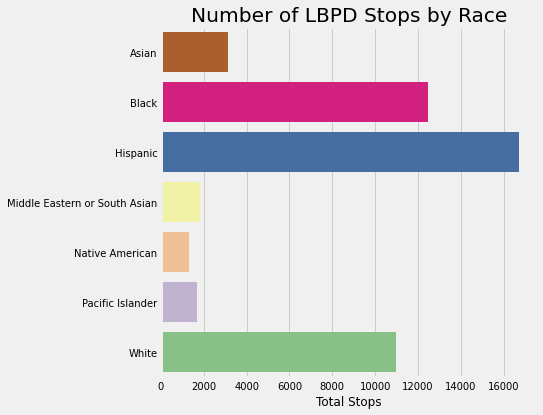

In [9]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='total_stops', y='race', data=stop_sums, palette='Accent_r')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10); 

## Getting Census Data to Normalize Race Data

In [10]:
lb_census = pd.read_csv('/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/raw_data/2019_lb_census.csv')

In [11]:
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' alone', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or African American', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('American Indian and Alaska Native', 'Native American', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('Native Hawaiian and Other ', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or Latino', '', x))

In [12]:
lb_census

,Race,Value
0,White,131216
1,Black,50432
2,Native American,668
3,Asian,54436
4,Pacific Islander,2468
5,Some other race,3008
6,Hispanic,207396


In [13]:
stop_sums_pop = stop_sums.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
stop_sums_pop.rename(columns={'Value':'population'}, inplace=True)
stop_sums_pop

,race,total_stops,population
0,Asian,3150,54436
1,Black,12472,50432
2,Hispanic,16716,207396
3,Native American,1301,668
4,Pacific Islander,1700,2468
5,White,10972,131216


In [14]:
stop_sums_pop['stops_per_thousand'] = round(stop_sums_pop['total_stops'] / (stop_sums_pop['population'] / 1000), 1)
stop_sums_pop

,race,total_stops,population,stops_per_thousand
0,Asian,3150,54436,57.9
1,Black,12472,50432,247.3
2,Hispanic,16716,207396,80.6
3,Native American,1301,668,1947.6
4,Pacific Islander,1700,2468,688.8
5,White,10972,131216,83.6


In [15]:
stop_sums_pop[stop_sums_pop['race'] != 'Hispanic'].sum()

race                  AsianBlackNative AmericanPacific IslanderWhite
total_stops                                                    29595
population                                                    239220
stops_per_thousand                                            3025.2
dtype: object

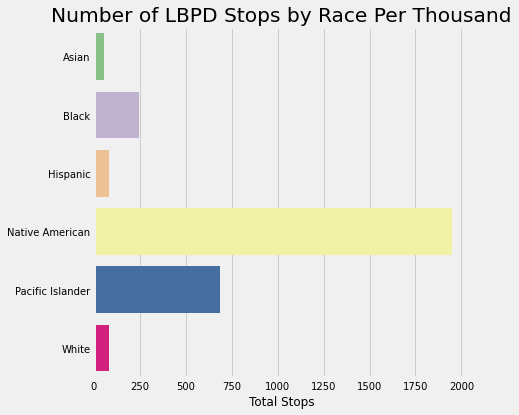

In [16]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='stops_per_thousand', y='race', data=stop_sums_pop, palette='Accent')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race Per Thousand')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10);

In [17]:
main_df = pd.read_csv(file_path + 'PROCESSED_0_to_5.csv')

/Users/terencerustia/opt/anaconda3/envs/lbpd_acab_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
main_df.head(3)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5875,2019/01/01 00:00:00,2020/06/26 07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54153,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153,Curbside detention,NaN,NaN,Citation for infraction,54153.0,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153
1,5782,2019/01/01 00:00:00,2020/06/26 00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021,Curbside detention,NaN,NaN,Field interview card completed,NaN,NaN
2,5876,2019/01/01 00:00:00,2020/06/26 18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,None,NaN,NaN,No Action,NaN,NaN


In [19]:
black_df = main_df[main_df['perceivedRace'] == 'Black']

In [20]:
black_df = pd.DataFrame(black_df['reasonForStop'].value_counts()).reset_index().rename(columns={'index':'reason', 'reasonForStop':'count'})
black_df

,reason,count
0,Traffic Violation,11304
1,Reasonable Suspicion,10191
2,Known to be on Parole / Probation / PRCS / Man...,735
3,Investigation to determine whether the person ...,433
4,Knowledge of outstanding arrest warrant/wanted...,372
5,Consensual Encounter resulting in a search,291


In [21]:
rfs_replace_dict = {'warrant': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

for r in rfs_replace_dict:
    black_df.loc[black_df['reason'].str.contains(r), 'reason'] = rfs_replace_dict[r]


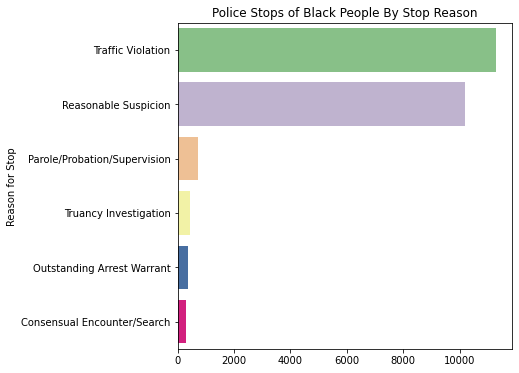

In [142]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='count', y='reason', data=black_df, palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Police Stops of Black People By Stop Reason')
ax.set_ylabel('Reason for Stop')
ax.set_xlabel('');

In [23]:
total_df = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
total_df.head(3)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5875,2019/01/01 00:00:00,2020/06/26 07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54153,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153,Curbside detention,NaN,NaN,Citation for infraction,54153.0,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153
1,5782,2019/01/01 00:00:00,2020/06/26 00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021,Curbside detention,NaN,NaN,Field interview card completed,NaN,NaN
2,5876,2019/01/01 00:00:00,2020/06/26 18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,None,NaN,NaN,No Action,NaN,NaN


In [24]:
total_df = pd.DataFrame(total_df[['reasonForStop', 'perceivedRace']])

In [25]:
total_df = total_df[~total_df['reasonForStop'].str.contains('Possible conduct|school policy')]
total_df

,reasonForStop,perceivedRace
0,Traffic Violation,Black
1,Reasonable Suspicion,White
2,Traffic Violation,Hispanic
3,Knowledge of outstanding arrest warrant/wanted...,Black
4,Reasonable Suspicion,White
...,...,...
82538,Traffic Violation,Asian
82539,Traffic Violation,Asian
82540,Traffic Violation,Hispanic
82541,Traffic Violation,Black


In [26]:
rfs_replace_dict = {'warrant': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

for r in rfs_replace_dict:
    total_df.loc[total_df['reasonForStop'].str.contains(r), 'reasonForStop'] = rfs_replace_dict[r]


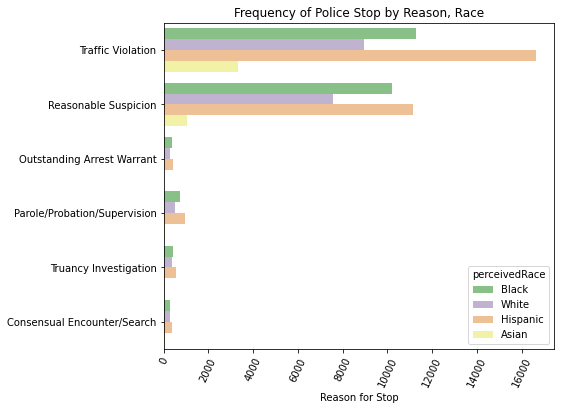

In [140]:
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='reasonForStop', data=total_df, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('Reason for Stop')
plt.ylabel('')
plt.title('Frequency of Police Stop by Reason, Race');

#### Frequency of Police Stop By Reason & Race, Per Thousand

In [116]:
reasonStop1000 = pd.DataFrame(resultStop.groupby(['reasonForStop', 'perceivedRace']).size().reset_index())
reasonStop1000.rename(columns={0:'count', 'perceivedRace':'race'}, inplace=True)
reasonStop1000 = reasonStop1000.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
reasonStop1000['perThou'] = round(reasonStop1000['count'] / (reasonStop1000['Value']/ 1000), 1)

for r in rfs_replace_dict:
    reasonStop1000.loc[reasonStop1000['reasonForStop'].str.contains(r), 'reasonForStop'] = rfs_replace_dict[r]

reasonStop1000 = reasonStop1000[~reasonStop1000['reasonForStop'].str.contains('|'.join(['No Action', 'minor', 'school', 'Homeland', 'Noncriminal']))]

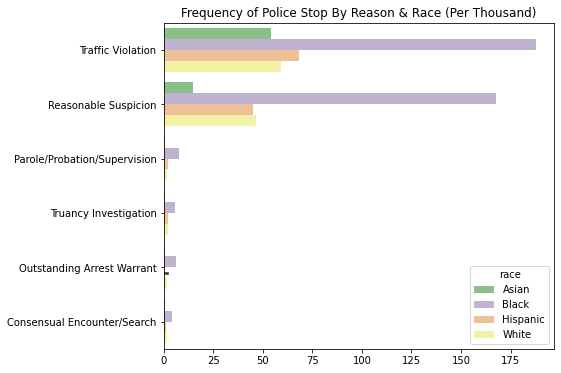

In [143]:
col_ord = ['Traffic Violation', 'Reasonable Suspicion', 'Parole/Probation/Supervision',
            'Truancy Investigation', 'Outstanding Arrest Warrant', 
            'Consensual Encounter/Search']

fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='reasonForStop', data=reasonStop1000,
    hue='race', palette='Accent',
    order=col_ord)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop By Reason & Race (Per Thousand)');

In [139]:
print('\nBlack folks are more likely to be stopped for traffic violation and reasonable suspicion compared to members of other races'.upper())
reasonStop1000[reasonStop1000['reasonForStop'].str.contains('Traffic|Reasonable')].sort_values(['reasonForStop', 'perThou'], ascending=False).reset_index(drop=True)


BLACK FOLKS ARE MORE LIKELY TO BE STOPPED FOR TRAFFIC VIOLATION AND REASONABLE SUSPICION COMPARED TO MEMBERS OF OTHER RACES


,reasonForStop,race,count,Value,perThou
0,Traffic Violation,Black,9461,50432,187.6
1,Traffic Violation,Hispanic,14207,207396,68.5
2,Traffic Violation,White,7792,131216,59.4
3,Traffic Violation,Asian,2945,54436,54.1
4,Reasonable Suspicion,Black,8446,50432,167.5
5,Reasonable Suspicion,White,6137,131216,46.8
6,Reasonable Suspicion,Hispanic,9302,207396,44.9
7,Reasonable Suspicion,Asian,816,54436,15.0


### Result of Stops

In [173]:
resultStop = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
resultStop = resultStop[~resultStop['resultOfStop'].str.contains('|'.join(['minor', 'school', 'Homeland', 'Noncriminal']))]
resultStop

resultStop.loc[resultStop['resultOfStop'].str.contains('outstanding warrant'), 'resultOfStop'] = 'Custodial Arrest with warrant'

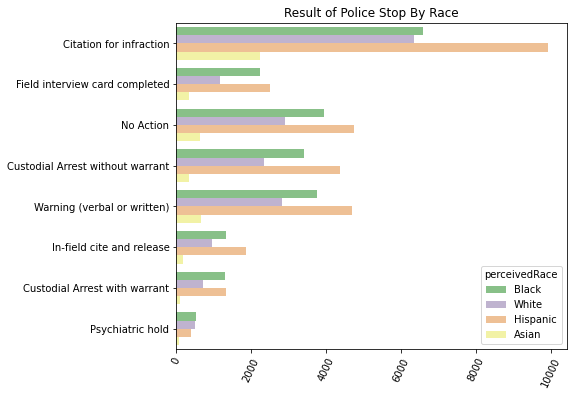

In [174]:
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='resultOfStop', data=resultStop, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Result of Police Stop By Race');

#### Police Stops By Result & Race, Per Thousand

In [175]:
resultStop1000 = resultStop.groupby(['resultOfStop', 'perceivedRace']).size().reset_index()
resultStop1000 = resultStop1000.rename(columns={'perceivedRace': 'race', 0:'count'}).merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
resultStop1000['perThou'] = round(resultStop1000['count'] / (resultStop1000['Value'] / 1000), 1)

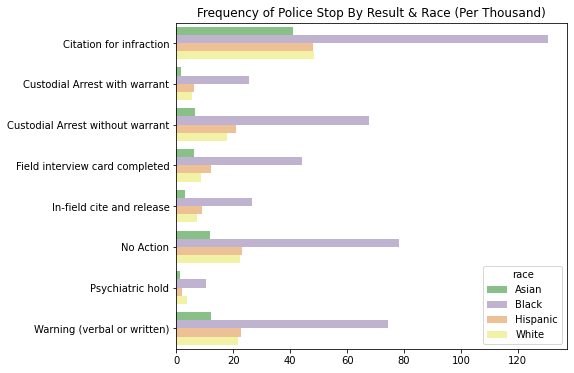

In [176]:
fig, ax = plt.subplots(figsize=(7,6))
g = sns.barplot(x='perThou', y='resultOfStop', data=resultStop1000,
    hue='race', palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop By Result & Race (Per Thousand)');

In [204]:
cast_res_stop = resultStop1000[resultStop1000['race'].isin(['Black', 'Hispanic', 'White'])].set_index(['resultOfStop', 'race']).sort_values(['race','perThou'], ascending=(True,False)).drop(['count', 'Value'], axis=1)

cast_res_stop_1000 = cast_res_stop.reset_index().pivot(index='resultOfStop', columns='race', values='perThou')
cast_res_stop.columns.name = None

cast_res_stop_1000

race,Black,Hispanic,White
resultOfStop,,,
Citation for infraction,130.8,47.9,48.4
Custodial Arrest with warrant,25.6,6.3,5.5
Custodial Arrest without warrant,67.8,21.1,17.8
Field interview card completed,44.2,12.0,8.8
In-field cite and release,26.4,8.9,7.3
No Action,78.3,22.9,22.2
Psychiatric hold,10.4,1.9,3.8
Warning (verbal or written),74.5,22.6,21.5
